In [1]:
from qiskit import *
from qiskit.extensions import *
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
import numpy as np
import math
import cmath

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

# Introduction

Concepts discussed in the field of quantum mechanics such as locality and reality have been a matter of discussion  since their introduction. Here is a brief definition of the terms: 
Locality: A theory that Einstein came up with suggesting that an occurrence at a particular location could not have an impact at another location within the time it would take for light to travel between the two locations. 

Realistic: Einstein claimed that there must be existence prior to measurement of that same something in his theory on Realism. However this was contrasting with opinions of Bohr who claimed that measuring something brings about its existence. However the idea of local reality was later disproved by Bell. In order to prove and disprove the idea of hidden local variables theoretical games were created to explore these concepts through comparison of classical and quantum strategies. An important concept related to this is Quantum Pseudo Telepathy. This concept refers to the idea that individuals that are separated by distance can still successfully win a communication game through quantum entanglement, even though a classical solution to the game is non-existent. This can be demonstrated through Mermin's Magic Square Game. 

Description: The Magic Square game is a theoretical game, in which a level of quantum entanglement between two players allows for a method to win the game. However, without this entanglement factor, it is impossible to win. The game allows for entanglement prior to when the two participants of the game must separate. At the beginning one player is asked to select values for one of the three rows and the other player selects values for one of the three columns that make up a 3 by 3 grid. The round is won if the sum of the column values is odd, the sum of the row values is even and the value that falls in the corresponding row and column, where they intersect, is the same in the response provided by both players. 

Example & scope: To give this more of a classical context, imagine that there is an odd number total of each crickets, frogs, and snakes in a given region. However, there is always a shortage or excess of food required for each of these animals in this particular location, and for this problem assuming on average each cricket,frog,or snake must receives its own unit of food,when there is not shortage or excess, then the amount of food must be represented by an even number. As a total can be displayed as a linear combination of n terms, this information can be shown in a 3 by 3 grid, where the column sums display quantities of food and the row sums display the number of each animal. Just to create a hypothetical situation, if twice as much food is required for each of these animals to survive, then the column sums should be even while the row sums should be odd. However if each square in a 3 by 3 grid represents one of three total terms(either 1 or 0) whose linear combination forms the sum of total number of animals or the total amount of food, then it is impossible for this scenario to exist within the 3 by 3 grid, at least using classical mathematics.  However with a quantum approach, a “winning strategy” can be developed. Each player chooses between a column and a row and if the number at the intersection is the same for both players, they win that round. So, if a random assortment of the linear combination of one animal is chosen by one player and a random linear combination of the food quantities is selected by another player, in both cases only using 0 and 1, where these values fit into a 3 by 3 grid. It is important that where the values intersect they match, as these are dependent variables. As crickets,frogs, and snakes are part of a food web, a change in the the quantity of food available for crickets can impact the number of snakes. When solving this using quantum theory and entanglement, two elements can be considered at a time, and this would be a plausible solution given it adds the element of time to the picture. It sort of explains patterns of life on earth, where there must be a balance even with shortanges and excess at any given moment.In this case it is possible for each round to be won. However in order to support this, the game must show almost all successes if not all in order to be considered a truly winning strategy. A circuit demonstrating this winning strategy is depicted below.


Background and description of the magic square game

# Playing the Game

[Instructions on playing the magic square game within this notebook]

# Game Setup: Create the Measurement Operators

[At this point, I am assuming the user knows what these operators are since they hopefully read the Introduction.]

[We need to let the player know that the measurement operators only need to be created once per game.]

In [2]:
# These are the unitary transformations that will be applied to each players qubits
unitB3= np.array([[1,0,0,1],[-1,0,0,1],[0,1,1,0],[0,-1,1,0]])* (1/math.sqrt(2))
unitB2 = np.array([[-1,1j,1,1j],[1,1j,1,-1j],[1,-1j,1,1j],[-1,-1j, 1,-1j]])*(1/2)
unitB1 = np.array([[1j,-1j,1,1],[-1j,-1j,1,-1],[1,1,-1j,1j],[-1j,1j,1,1]])*(1/2)
unitA3 = np.array([[-1,-1,-1,1],[1,1,-1,1],[1,-1,1,1],[1,-1,-1,-1]])*(1/2)
unitA2 = np.array([[1j,1,1,1j],[-1j,1,-1,1j],[1j,1,-1,-1j],[-1j,1,1,-1j]])*(1/2)
unitA1 = np.array([[1j,0,0,1],[0,-1j,1,0],[0,1j,1,0],[1,0,0,1j]])*(1/math.sqrt(2))

<a id="play"/>

# 1. Create the initial state


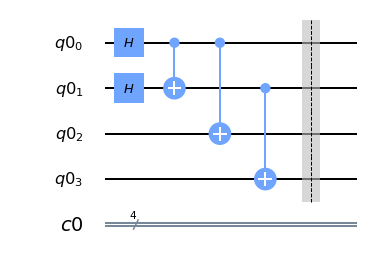

In [3]:
q = QuantumRegister(4)

# set register to 2 if we only want to measure one of the player's qubits
#c = ClassicalRegister(2)

# set register to 4 if we want to measure all of the qubits
c = ClassicalRegister(4)

circuit = QuantumCircuit(q,c)

#This applies a Haddamard Gate to qubits 1 and 2 in the circuit
circuit.h(q[0:2])

# Following this, three CNOT gates are applied that create a maximum entangled state for the 4 qubits
circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])
circuit.cx(q[1],q[3])

# Add a barrier to ensure that system preparation is done before our measurement operators are applied
circuit.barrier()

# Display for the initial entangled state of the four qubits representing the two players
circuit.draw(output='mpl')

# 2. Player 1 Selects a Row

[Add description for row selection]

In [4]:
# Selecting Row for Player 1
questionA = int(input("Select a Row for Player one's entry. Enter 1,2, or 3 for the corresponding row: "))
selectedRowUnitary = None
if questionA == 1:
    selectedRowUnitary = unitA1
if questionA == 2: 
    selectedRowUnitary = unitA2
if questionA == 3:
    selectedRowUnitary = unitA3
circuit.unitary(selectedRowUnitary,q[0:2])
circuit.barrier()
print("You selected A{}".format(questionA))
print(selectedRowUnitary)

Select a Row for Player one's entry. Enter 1,2, or 3 for the corresponding row: 1
You selected A1
[[0.        +0.70710678j 0.        +0.j         0.        +0.j
  0.70710678+0.j        ]
 [0.        +0.j         0.        -0.70710678j 0.70710678+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.70710678j 0.70710678+0.j
  0.        +0.j        ]
 [0.70710678+0.j         0.        +0.j         0.        +0.j
  0.        +0.70710678j]]


In [5]:
# Selecting Row for Player 2
questionB = int(input("Select a Row for Player two's entry. Enter 1,2, or 3 for the corresponding column: "))
selectedColumnUnitary = None
if questionB == 1:
    selectedColumnUnitary = unitB1
if questionB == 2: 
    selectedColumnUnitary = unitB2
if questionB == 3:
    selectedColumnUnitary = unitB3
circuit.unitary(selectedColumnUnitary,q[2:4])
circuit.barrier()
print("You selected B{}".format(questionB))
print(selectedColumnUnitary)

Select a Row for Player two's entry. Enter 1,2, or 3 for the corresponding column: 2
You selected B2
[[-0.5+0.j   0. +0.5j  0.5+0.j   0. +0.5j]
 [ 0.5+0.j   0. +0.5j  0.5+0.j   0. -0.5j]
 [ 0.5+0.j   0. -0.5j  0.5+0.j   0. +0.5j]
 [-0.5+0.j   0. -0.5j  0.5+0.j   0. -0.5j]]


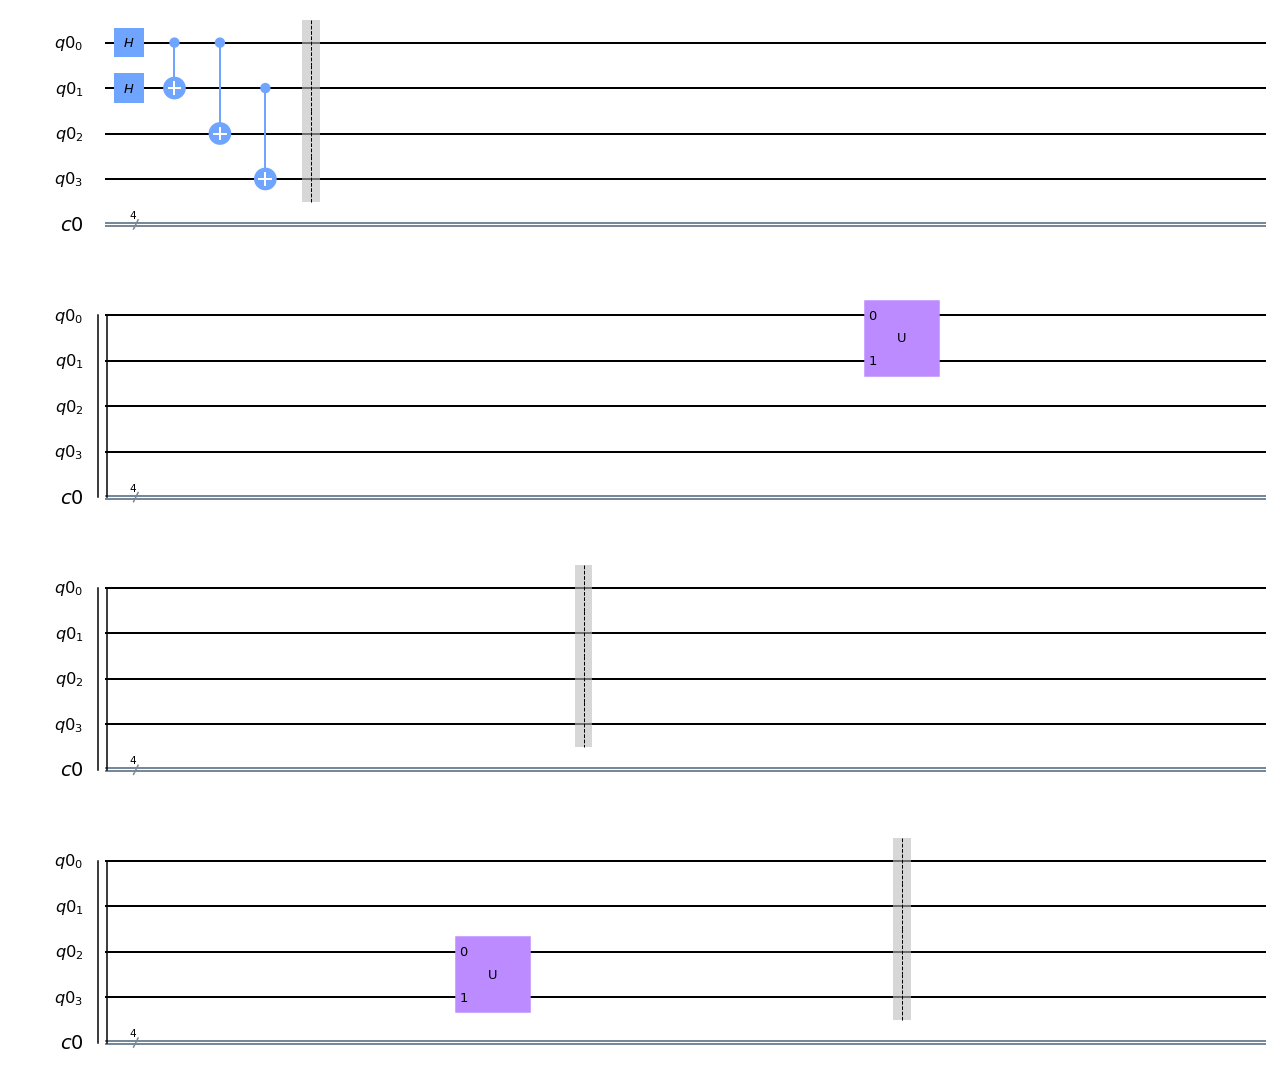

In [6]:
circuit.draw(output='mpl')

# Unroll the circuit

By unrolling the circuit we can see the gates the IBM will use to implement our circuit.

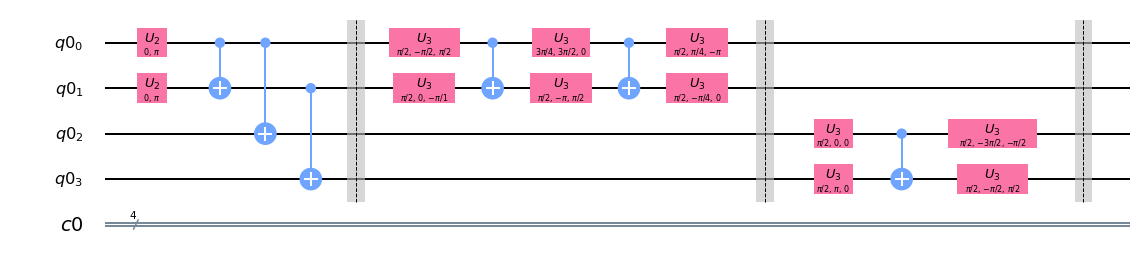

In [7]:
pass_ = Unroller(['u1','u2','u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(circuit) 
new_circuit.draw(output='mpl')

# Measure the System

In [14]:
# measure all of the qubits (be sure the ClassicalRegister was created w/ 4 qubits)
#circuit.measure(q,c)

# measure player A's qubits (be sure the ClassicalRegister was created w/ 2 qubits)
a = circuit.measure(q[0:2],c[0:2])


# measure player B's qubits (be sure the ClassicalRegister was created w/ 2 qubits)
#b = circuit.measure(q[2:4],c[2:4])

# Get a reference to the qasm simulator
backend = Aer.get_backend('qasm_simulator')
# Execute the circuit on the simulator
job = execute(circuit, backend, shots=1)
# print(job)
# Get the results
result = job.result()
# Returns counts
counts = result.get_counts(circuit)
# TODO: validate that we have one and only one key
bitstring = None
for key in counts.keys():
    bitstring = key
# bitstring = counts.keys()
print(bitstring)

0011


# Calculate Parity Bits

[Player A should measure a specific two-qubit state such as 01. Player A then needs to determine which bit is need to ensure an even parity. Likewise, Player B should measure and then based on the result, determine which bit is needed for an odd parity.]

In [38]:
# starting from the right side of the bit string, bits 0 and 1 are for the row and 2 and 3 are for the column. 
a = bitstring[2:4]
b = bitstring[0:2]
# TODO: this needs to be optimized, the casting is inefficient
a3 = 0 if (int(a[0]) + int(a[1])) % 2 == 0 else 1
b3 = 0 if (int(b[0]) + int(b[1])) % 2 == 1 else 1
a = a + str(a3)
b = b + str(b3)
print('a: {}, b: {}'.format(a, b))


a: 110, b: 001


In [45]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits = 5)

ModuleNotFoundError: No module named 'qiskit_textbook'

# Comparing Bits

[If player A chose row i and Player B chose column j, then the ith bit of Player A's bit string should match the jth bit of Player B's bit string. It would be cool if we could show this in a "magic square".]

In [40]:
t = '123'

arev = a[::-1]
brev = b[::-1]
# a_n represents row n. Column 1 in row n is index 0 (starting from right side of bit string)
# if 
# b_n represents column n. Row 1 in column n is index 0 (starting from right side of bit string)
isSuccess = False
for i in range(1,3):
    for j in range(1,3):
        if i == questionA and j == questionB:
            # verify that they're the same
            isSuccess = True if arev[i-1] == brev[j-1] else False
            print('   ' + arev[i-1] + '   ')
        elif i == questionA:
            print('   ' + arev[i-1] + '   ')
        elif j == questionB:
            print('   ' + brev[j-1] + '   ')
        else:
            print('       ')
print(isSuccess)

   0   
   0   
       
   0   
True


# Next Round

[We should encourage the player to play another round and verify that the bits continue to match as they did in the last step. We can possibly use a link back up to the top to start the game again.]

[Play another round](#play)